# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city SEE IF THIS WORKS - MAYBE REMOVE INFO AFTER CITY
    city_url = f"{url}APPID={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    #print(city_weather)
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | pecos
Processing Record 5 of Set 1 | curvelo
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | tuy hoa
Processing Record 8 of Set 1 | mbandaka
Processing Record 9 of Set 1 | saryozek
Processing Record 10 of Set 1 | dabola
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | soquel
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | ajra
Processing Record 21 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,7.05,94,43,0.86,CA,1693467254
1,ponta do sol,32.6667,-17.1000,23.35,78,53,1.52,PT,1693467237
2,rikitea,-23.1203,-134.9692,21.57,80,31,7.02,PF,1693467112
3,pecos,31.4229,-103.4932,26.84,43,0,0.00,US,1693467438
4,curvelo,-18.7564,-44.4308,20.77,75,5,0.21,BR,1693467439


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

OSError: Cannot save file into a non-existent directory: '..\output_data'

In [11]:
# Read saved data
#city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,7.05,94,43,0.86,CA,1693467254
1,ponta do sol,32.6667,-17.1000,23.35,78,53,1.52,PT,1693467237
2,rikitea,-23.1203,-134.9692,21.57,80,31,7.02,PF,1693467112
3,pecos,31.4229,-103.4932,26.84,43,0,0.00,US,1693467438
4,curvelo,-18.7564,-44.4308,20.77,75,5,0.21,BR,1693467439


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

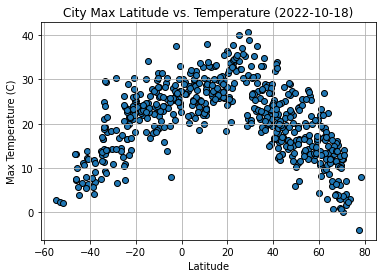

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()


#### Latitude Vs. Humidity

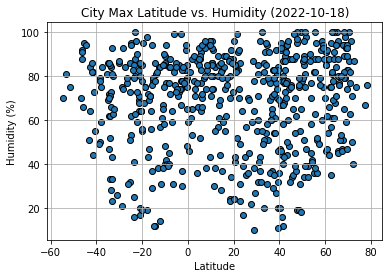

In [13]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

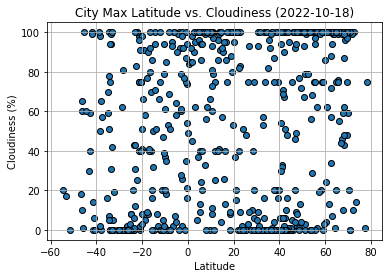

In [14]:
# Build scatter plot for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

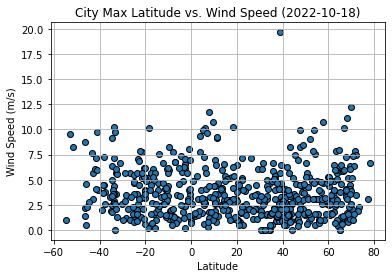

In [21]:
# Build scatter plot for latitude vs. wind speed (SEE BELOW - Y AXIZ IS DIFFERENT?)
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.axis.ymargin: .0
plt.scatter(x_values,y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("/..output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      4.036404
1      3.166722
2      4.649678
3      3.957645
4      3.634236
         ...   
568    2.942164
569    4.187261
570    3.222106
571    3.688649
572    3.073856
Name: Lat, Length: 573, dtype: float64


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,7.05,94,43,0.86,CA,1693467254
1,ponta do sol,32.6667,-17.1000,23.35,78,53,1.52,PT,1693467237
3,pecos,31.4229,-103.4932,26.84,43,0,0.00,US,1693467438
6,tuy hoa,13.0833,109.3000,32.88,57,96,2.47,VN,1693467319
7,mbandaka,0.0487,18.2603,27.21,59,49,1.39,CD,1693467157


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,rikitea,-23.1203,-134.9692,21.57,80,31,7.02,PF,1693467112
4,curvelo,-18.7564,-44.4308,20.77,75,5,0.21,BR,1693467439
5,arraial do cabo,-22.9661,-42.0278,19.95,88,12,6.86,BR,1693467112
10,atuona,-9.8000,-139.0333,26.06,77,18,5.95,PF,1693467114
17,mingoyo,-10.1000,39.6333,31.55,40,1,3.36,TZ,1693467441


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5407389943031798


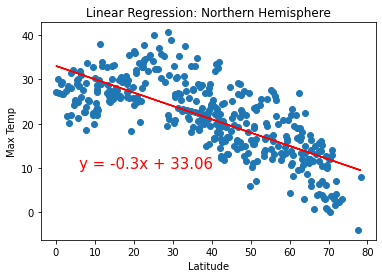

In [43]:
# Linear regression on Northern Hemisphere: Temp Vs Latitude
#Defining the y and y values:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression: Northern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

The r-value is: 0.5481867785998679


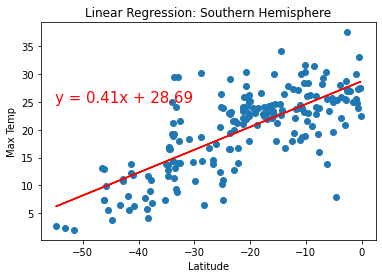

In [66]:
# Linear regression on Southern Hemisphere:Temperature vs. Latitude
#Defining the y and y values:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression: Southern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the Northern Hemisphere there seems to be a close corrolation between lattitde and temperature: The higher the lattitude, the colder the temperature and vice versa. In the Southern Hemisphere, it is less defined, but here the closer to the equator ("0") the warmer the temperatures, but only to about -40 degrees and then the data indicates it is less defined or may be anomalies in the data (ie less data?).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0022749925445057348


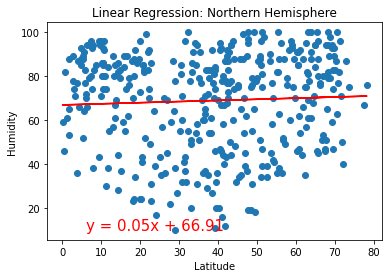

In [53]:
# Linear regression on Northern Hemisphere: Humidity vs. Latitude
#Defining the y and y values:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression: Northern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

The r-value is: 0.00012291196396696494


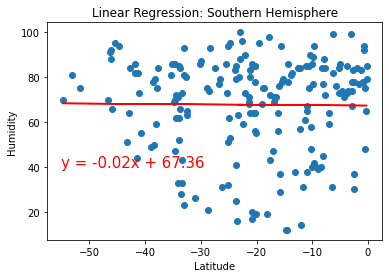

In [64]:
# Linear regression on Southern Hemisphere:Humidity vs. Latitude
#Defining the y and y values:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression: Southern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Once again there appears to be more data reflected in this visual (Northern Hemisphere), as opposed to Southern Hemisphere data (given the number of datapoints refected). The linera regression line seems to indicate (Northern Hemisphere), the higher the laattitude the higher the humidity. However it appears that the highest humidity is from 60 degrees lattitide. The Southern Hemmisphere data is less conclusive perhapsbut seems to indicate there is very little humidity below 40 degrees South and the concentratio is once again closer to the equator, however there are lots of outlyers here.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0010181070983807852


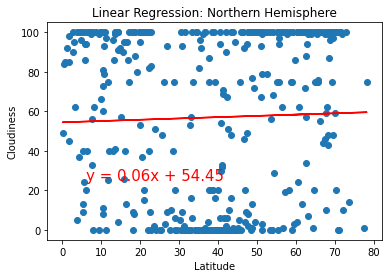

In [67]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere: Cloudiness vs. Latitude
#Defining the y and y values:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression: Northern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

The r-value is: 0.028557980321621053


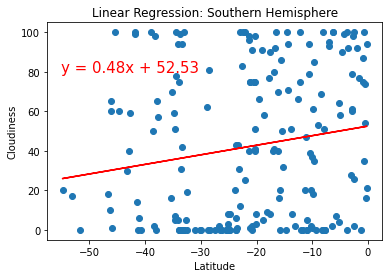

In [68]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere:Cloudiness vs. Latitude
#Defining the y and y values:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression: Southern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0007890517830452484


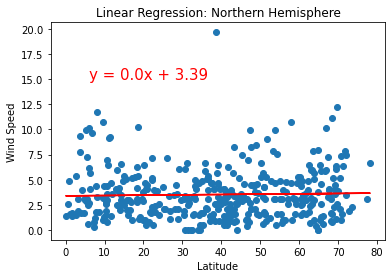

In [69]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere: Wind Speed vs. Latitude
#Defining the y and y values:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,15),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression: Northern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

The r-value is: 0.01793293405710491


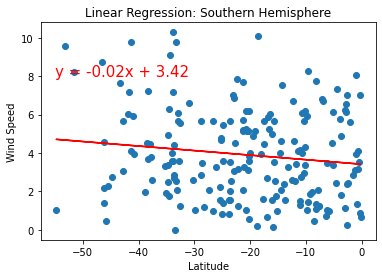

In [71]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere:Wind Speed vs. Latitude
#Defining the y and y values:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values, marker="o")

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression: Southern Hemisphere")
plt.grid(False)

#Print r square value
print(f"The r-value is: {rvalue**2}")

# Save the figure
#plt.savefig("/..output_data/Fig1.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The wind speed in the Northern Hemisphere remains quite consistent across all latitudes. It rarely exceeds 7.5 m/s. The wind speed in the Southern Hemisphere is also consistent across all latitudes, but is more varied than the Northern Hemisphere.  The Southern Hemispher data is less consistent.